In [109]:
# multineural Network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from Machine_learning_Python.Utility.DataPreprocessing.DataPreprocessing import DataPreprocessing

In [110]:
dataframe = pd.read_csv('Data/bank.csv',sep=";")

In [111]:
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [112]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [113]:
dataframe = dataframe.drop(['marital', 'housing','education', 'contact', 'day', 'month', 'poutcome','job'], axis=1)

In [114]:
dataframe.nunique()

age           67
default        2
balance     2353
loan           2
duration     875
campaign      32
pdays        292
previous      24
y              2
dtype: int64

In [115]:
dataframe.replace(['yes','no'],[1,0],inplace=True)

In [116]:
dataframe.head()

,age,default,balance,loan,duration,campaign,pdays,previous,y
0,30,0,1787,0,79,1,-1,0,0
1,33,0,4789,1,220,1,339,4,0
2,35,0,1350,0,185,1,330,1,0
3,30,0,1476,1,199,4,-1,0,0
4,59,0,0,0,226,1,-1,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff89c038748>,
      dtype=object)

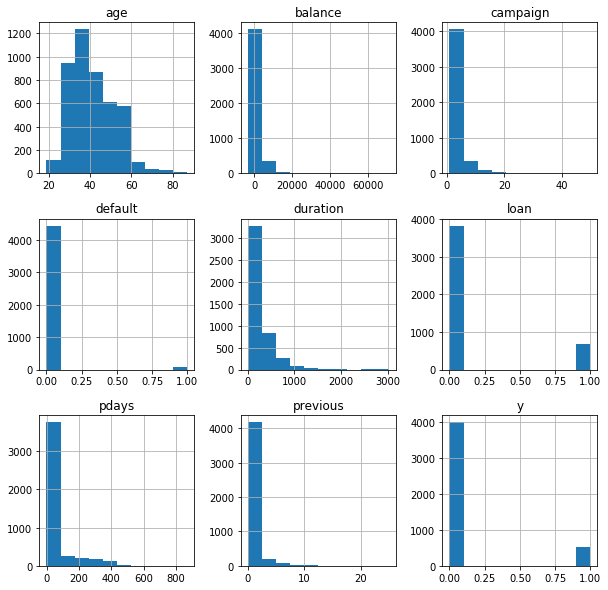

In [117]:
dataframe.hist(figsize=(10,10))

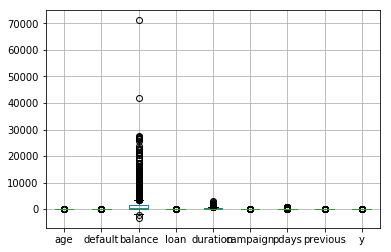

In [118]:
dataframe.boxplot()

In [119]:
dataframe.isna().sum()

age         0
default     0
balance     0
loan        0
duration    0
campaign    0
pdays       0
previous    0
y           0
dtype: int64

In [120]:
class DataPreprocessing:

    def __init__(self):
        print()

    @staticmethod
    def complete_Replace(dataframe, original, new):
        return dataframe[original].replace(original, new, inplace=True)

    @staticmethod
    def one_hot_encoder(dataframe):
        return pd.get_dummies(dataframe)

    @staticmethod
    def fill_Na(dataframe, column, fill):
        dataframe[column] = dataframe[column].fillna(fill)
        return dataframe

    @staticmethod
    def feature_scaling(dataframe, column):
        dataframe[column] = np.divide(np.subtract(dataframe, dataframe[column].mean()),
                                      dataframe[column].std())
        return dataframe[column]

    @staticmethod
    def split(dataframe, numrows):
        test_data = dataframe.tail(numrows).reset_index(drop=True)
        # here we reset index as if the index remain same for accessing by index could be difficult
        return dataframe.head(len(dataframe)-numrows).reset_index(), test_data.reset_index()

    @staticmethod
    def sigmoid_Function(Z):
        gz= np.divide(1, 1+np.exp(np.multiply(-1,Z)))
        return gz
    
    @staticmethod
    def remove_outlier(dataframe):
        dataframe = dataframe[np.abs(dataframe - dataframe.mean()) <= (3 * dataframe.std())]
        return dataframe.reset_index()


In [131]:
# inheritance
class Data_Prep_child(DataPreprocessing):
    pass

In [122]:
column = ['age','balance','duration','campaign','pdays','previous']
for item in column:
    dataframe[item] = Data_Prep_child.feature_scaling(dataframe,item)

In [123]:
dataframe.head()

,age,default,balance,loan,duration,campaign,pdays,previous,y
0,-1.056153,0,-0.473052,0,-1.019860,-1.237949,-0.407734,-0.944005,0
1,-0.772497,0,-0.472957,1,-1.018769,-1.146736,-0.404901,-0.776515,0
2,-0.583394,0,-0.472894,0,-1.018041,-1.085927,-0.403012,-0.664855,0
3,-1.056153,0,-0.473052,1,-1.019860,-1.237949,-0.407734,-0.944005,0
4,1.685850,0,-0.472140,0,-1.009308,-0.356221,-0.380347,0.675069,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff89bbd8320>,
      dtype=object)

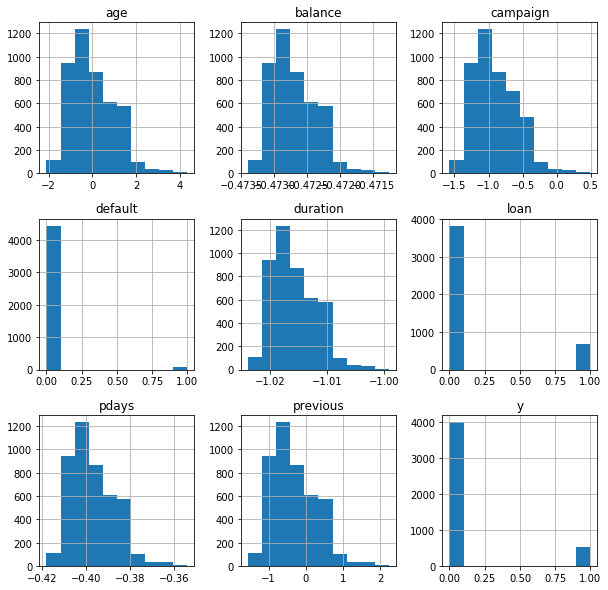

In [124]:
dataframe.hist(figsize=(10,10))

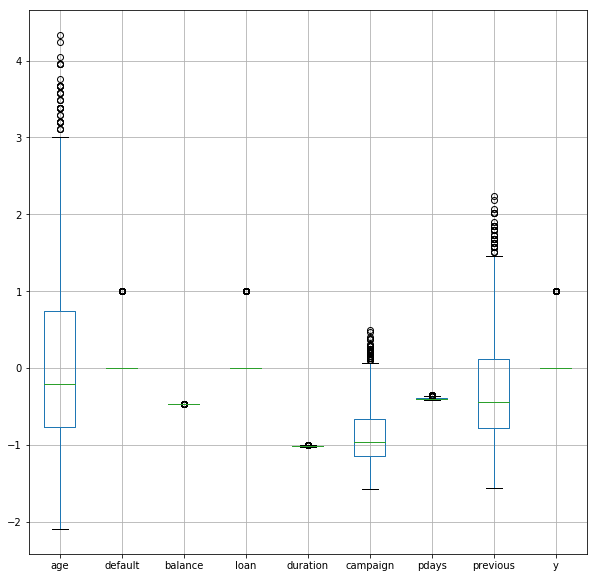

In [125]:
dataframe.boxplot(figsize=(10,10))

In [126]:
# There are outliers however we'll first see how it works without outliers, as it gave 87.6 % accuracy not deleted  null values

In [127]:
dataframe, test_data = Data_Prep_child.split(dataframe,500)

In [128]:
class Neural_Network:
    
    def __init__(self):
        # epochs
        self.iteration = 2000
        self.learning_rate = 0.08
        # number of neurons in each layer last is the output layer
        self.neurons = list([5,3,1])
        self.boundary = 0.5
    
    def sigmoid(self,Z):
        # sigmoid function calculation
        gz= np.divide(1, 1+np.power(np.e,np.multiply(-1,Z)))
        return gz
    
    def  train(self,dataframe):
        # stores the num rows in dataframe
        train_size = dataframe.shape[0]
        # storing the outputs of dataframe
        train_outputs = pd.DataFrame(dataframe['y']).T
        # deleting the outputs from dataframe for computing
        dataframe = dataframe.drop('y',axis=1)
        # adding dummy layer to the data frame
        dataframe = dataframe.drop('index',axis=1)
        # weights of hidden layer 1
        weights1 = np.random.rand(self.neurons[0],dataframe.shape[1]) # 5,8
        bais1 = np.full((self.neurons[0],1),1.0) # 5,1
         # weights of hidden layer 2
        weights2 = np.random.rand(self.neurons[1],weights1.shape[0]) # 3,5
        bais2 = np.full((self.neurons[1],1),1.0) # 3,1
        
        # weights of output layer
        weights3 = np.random.rand(self.neurons[2],weights2.shape[0]) # 1,3
        bais3 = np.full((self.neurons[2],1),1.0) # 1,1
        
        for iteration in range(1,self.iteration):
        # forward propagation
            # hidden layer
            # Layer 1 
            Z1 =  pd.DataFrame(np.add(np.matmul(weights1,dataframe.T),bais1)) # 5,m
            A1 = self.sigmoid(Z1) # 5,m
            # Layer 2
            Z2 = pd.DataFrame(np.add(np.matmul(weights2,A1),bais2)) # 3,m
            A2 = self.sigmoid(Z2) # 3,m
            # layer 3
            Z3 = pd.DataFrame(np.add(np.matmul(weights3,A2),bais3)) # 1,m
            A3 = self.sigmoid(Z3) # 1,m
            # calculating Loss
            loss = np.add(
                    np.multiply(
                        np.log(A3.T),train_outputs.T
                    ),np.multiply(
                        np.subtract(1,train_outputs.T),
                                        np.log(np.subtract(1,A3.T))))
            loss = np.divide(loss.sum(),train_size)*(-1)
            # as above loss was becoming an array hence converted into a single number
            loss= loss[0] # 1,1
            if iteration%30==0:
                plt.plot(iteration,loss, markersize=0.6,color='r',marker='*')
                
            # backward propagation
            
            # output side that is layer 3
            dz3 = np.subtract(A3,train_outputs) # 1,m
            dw3 = np.divide(np.matmul(dz3,A2.T),train_size) # 1,3
            db3 = np.array(np.sum(dz3,axis=1)/train_size).reshape(1,1) # 1,1
            weights3 = np.subtract(weights3,np.multiply(self.learning_rate,dw3)) # 1,3
            bais3 = bais3 - self.learning_rate*db3 # 1,1
            # hidden layer side
            
            # Hidden layer 2
            g2_derv = np.multiply(A2,np.subtract(1,A2)) # 3,m
            dz2=np.multiply(np.matmul(weights3.T,dz3),g2_derv) # 3,m
            dw2=np.divide(np.matmul(dz2,A1.T),train_size) # 3,5
            db2=np.array(np.divide(np.sum(dz2 ,axis=1),train_size)).reshape(dz2.shape[0],1) # 3,1
            weights2= np.subtract(weights2,np.multiply(self.learning_rate,dw2)) # 3,5
            bais2 = np.subtract(bais2,np.multiply(self.learning_rate,db2)) # 3,1
        
            # Hidden Layer 1
            g1_derv = np.multiply(A1,np.subtract(1,A1)) # 5,m
            dz1=np.multiply(np.matmul(weights2.T,dz2),g1_derv) # 5,m
            dw1=np.divide(np.matmul(dz1,dataframe),train_size) # 5,8
            db1=np.array(np.divide(np.sum(dz1 ,axis=1),train_size)).reshape(dz1.shape[0],1) # 5,1
            weights1= np.subtract(weights1,np.multiply(self.learning_rate,dw1)) # 5,8
            bais1 = np.subtract(bais1,np.multiply(self.learning_rate,db1)) # 5,1
        plt.title("iteration vs loss")
        plt.show()
        return weights1,bais1,weights2,bais2,weights3,bais3
    
    def test(self,test_data,weights1,bais1,weights2,bais2,weights3,bais3):
        outputs = np.array(test_data['y']).reshape(test_data.shape[0],1) # m,1
        test_size = test_data.shape[0]
        # deleting the output column from test_data
        test_data = test_data.drop('y',axis=1)  
        test_data = test_data.drop('index',axis=1) # m,8
        Z1= np.add(np.matmul(weights1,test_data.T),bais1) # added transpose 5,m
        A1 = self.sigmoid(Z1) # 5,m
        
        Z2 = np.add(np.matmul(weights2,A1),bais2) # 3,m
        A2 = self.sigmoid(Z2) # 3,m
        
        # outputs
        Z3 = np.add(np.matmul(weights3,A2),bais3) # 1,m
        A3 = self.sigmoid(Z3).T # m,1
        
        Ypred =np.zeros(test_data.shape[0])
        count = 0
        for counter in range(0,test_data.shape[0]):
            if A3[counter]>self.boundary :
                Ypred[counter]=1
            else:
                Ypred[counter]=0
            if Ypred[counter]==outputs[counter]:
                count+=1
        accuracy  = count/test_data.shape[0]
        # printing the accuracy
        print("Accuracy",accuracy*100)
    
    def main(self,dataframe,test_data):
        # Storing the weights of the various layers which were calculated in training phase
        weights1,bais1,weights2,bais2,weights3,bais3 = self.train(dataframe)
        print("Weights1 : {},bais1: {} , we2: {}, bais2: {}"
              .format(weights1.shape,bais1.shape,weights2.shape,bais2.shape))
        # performing the test on test data
        self.test(test_data,weights1,bais1,weights2,bais2,weights3,bais3)

In [129]:
neural = Neural_Network()

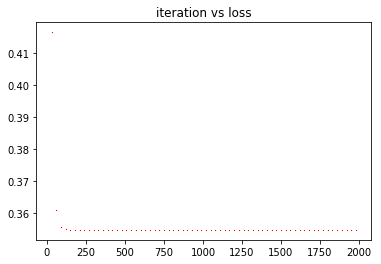

Weights1 : (5, 8),bais1: (5, 1) , we2: (3, 5), bais2: (3, 1)
Accuracy 87.6


In [130]:
neural.main(dataframe,test_data)